# *****Electric Vehicle Data Analysis***** #

# Import library #

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset #

In [3]:
df = pd.read_csv("Auta .csv")

### Top Five data show ###

In [4]:
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


### Change Column Name ###

In [5]:
# Column renaming mapping
col_map = {
    "Car full name": "car_full_name",
    "Make": "make",
    "Model": "model",
    "Minimal price (gross) [PLN]": "price_pln",
    "Engine power [KM]": "engine_power_km",
    "Maximum torque [Nm]": "max_torque_nm",
    "Type of brakes": "brake_type",
    "Drive type": "drive_type",
    "Battery capacity [kWh]": "battery_kwh",
    "Range (WLTP) [km]": "range_km",
    "Wheelbase [cm]": "wheelbase_cm",
    "Length [cm]": "length_cm",
    "Width [cm]": "width_cm",
    "Height [cm]": "height_cm",
    "Minimal empty weight [kg]": "empty_weight_kg",
    "Permissable gross weight [kg]": "gross_weight_kg",
    "Maximum load capacity [kg]": "max_load_kg",
    "Number of seats": "seats",
    "Number of doors": "doors",
    "Tire size [in]": "tire_in",
    "Maximum speed [kph]": "max_speed_kph",
    "Boot capacity (VDA) [l]": "boot_l",
    "Acceleration 0-100 kph [s]": "accel_0_100_s",
    "Maximum DC charging power [kW]": "dc_power_kw",
    "mean - Energy consumption [kWh/100 km]": "energy_kwh_per_100km"
}

# Apply renaming
df = df.rename(columns=col_map)




In [6]:
df.head(1)

,car_full_name,make,model,price_pln,engine_power_km,max_torque_nm,brake_type,drive_type,battery_kwh,range_km,...,gross_weight_kg,max_load_kg,seats,doors,tire_in,max_speed_kph,boot_l,accel_0_100_s,dc_power_kw,energy_kwh_per_100km
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45


### Check null value ###

In [7]:
df.isnull().sum()

car_full_name           0
make                    0
model                   0
price_pln               0
engine_power_km         0
max_torque_nm           0
brake_type              1
drive_type              0
battery_kwh             0
range_km                0
wheelbase_cm            0
length_cm               0
width_cm                0
height_cm               0
empty_weight_kg         0
gross_weight_kg         8
max_load_kg             8
seats                   0
doors                   0
tire_in                 0
max_speed_kph           0
boot_l                  1
accel_0_100_s           3
dc_power_kw             0
energy_kwh_per_100km    9
dtype: int64

In [8]:
# 1. Fill brake_type missing with mode
df["brake_type"] = df["brake_type"].fillna(df["brake_type"].mode()[0])

# 2. Fill gross_weight_kg missing with median
df["gross_weight_kg"] = df["gross_weight_kg"].fillna(df["gross_weight_kg"].median())

# 3. Fill max_load_kg by calculation where possible, else median
mask = df["max_load_kg"].isna() & df["gross_weight_kg"].notna() & df["empty_weight_kg"].notna()
df.loc[mask, "max_load_kg"] = df.loc[mask, "gross_weight_kg"] - df.loc[mask, "empty_weight_kg"]
df["max_load_kg"] = df["max_load_kg"].fillna(df["max_load_kg"].median())

# 4. Fill boot_l with median
df["boot_l"] = df["boot_l"].fillna(df["boot_l"].median())

# 5. Fill accel_0_100_s with median per make
df["accel_0_100_s"] = df.groupby("make")["accel_0_100_s"].transform(lambda x: x.fillna(x.median()))

# 6. Fill energy_kwh_per_100km by calculation if possible, else median
mask = df["energy_kwh_per_100km"].isna() & df["battery_kwh"].notna() & df["range_km"].notna()
df.loc[mask, "energy_kwh_per_100km"] = (df.loc[mask, "battery_kwh"] / df.loc[mask, "range_km"]) * 100
df["energy_kwh_per_100km"] = df["energy_kwh_per_100km"].fillna(df["energy_kwh_per_100km"].median())


In [9]:
df.isnull().sum()

car_full_name           0
make                    0
model                   0
price_pln               0
engine_power_km         0
max_torque_nm           0
brake_type              0
drive_type              0
battery_kwh             0
range_km                0
wheelbase_cm            0
length_cm               0
width_cm                0
height_cm               0
empty_weight_kg         0
gross_weight_kg         0
max_load_kg             0
seats                   0
doors                   0
tire_in                 0
max_speed_kph           0
boot_l                  0
accel_0_100_s           0
dc_power_kw             0
energy_kwh_per_100km    0
dtype: int64

### Find Information ###

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_full_name         53 non-null     object 
 1   make                  53 non-null     object 
 2   model                 53 non-null     object 
 3   price_pln             53 non-null     int64  
 4   engine_power_km       53 non-null     int64  
 5   max_torque_nm         53 non-null     int64  
 6   brake_type            53 non-null     object 
 7   drive_type            53 non-null     object 
 8   battery_kwh           53 non-null     float64
 9   range_km              53 non-null     int64  
 10  wheelbase_cm          53 non-null     float64
 11  length_cm             53 non-null     float64
 12  width_cm              53 non-null     float64
 13  height_cm             53 non-null     float64
 14  empty_weight_kg       53 non-null     int64  
 15  gross_weight_kg       53 

### Describe ###

In [11]:
df.describe()

,price_pln,engine_power_km,max_torque_nm,battery_kwh,range_km,wheelbase_cm,length_cm,width_cm,height_cm,empty_weight_kg,gross_weight_kg,max_load_kg,seats,doors,tire_in,max_speed_kph,boot_l,accel_0_100_s,dc_power_kw,energy_kwh_per_100km
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,246158.509434,269.773585,460.037736,62.366038,376.905660,273.581132,442.509434,186.241509,155.422642,1868.452830,2263.207547,446.773585,4.905660,4.849057,17.679245,178.169811,444.716981,7.332075,113.509434,18.329014
std,149187.485190,181.298589,261.647000,24.170913,118.817938,22.740518,48.863280,14.280641,11.275358,470.880867,516.756614,264.158944,0.838133,0.455573,1.868500,43.056196,178.458935,2.724940,57.166970,4.357560
min,82050.000000,82.000000,160.000000,17.600000,148.000000,187.300000,269.500000,164.500000,137.800000,1035.000000,1310.000000,-405.000000,2.000000,3.000000,14.000000,123.000000,171.000000,2.500000,22.000000,12.558140
25%,142900.000000,136.000000,260.000000,40.000000,289.000000,258.800000,411.800000,178.800000,148.100000,1530.000000,1970.000000,417.000000,5.000000,5.000000,16.000000,150.000000,315.000000,5.100000,100.000000,15.400000
50%,178400.000000,204.000000,362.000000,58.000000,364.000000,270.000000,447.000000,180.900000,155.600000,1685.000000,2119.000000,485.000000,5.000000,5.000000,17.000000,160.000000,425.000000,7.600000,100.000000,16.650000
75%,339480.000000,372.000000,640.000000,80.000000,450.000000,290.000000,490.100000,193.500000,161.500000,2370.000000,2725.000000,565.000000,5.000000,5.000000,19.000000,200.000000,543.000000,9.000000,150.000000,21.850000
max,794000.000000,772.000000,1140.000000,100.000000,652.000000,327.500000,514.000000,255.800000,191.000000,2710.000000,3500.000000,1056.000000,8.000000,5.000000,21.000000,261.000000,870.000000,13.100000,270.000000,28.200000


### Find Duplicate ###

In [12]:
df.duplicated().any()

False

### Last Five row ###

In [13]:
df.tail()

,car_full_name,make,model,price_pln,engine_power_km,max_torque_nm,brake_type,drive_type,battery_kwh,range_km,...,gross_weight_kg,max_load_kg,seats,doors,tire_in,max_speed_kph,boot_l,accel_0_100_s,dc_power_kw,energy_kwh_per_100km
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,310,disc (front) + drum (rear),2WD (rear),77.0,549,...,2280.0,412.0,5,5,19,160,385.0,7.9,125,15.9
49,Volkswagen ID.4 1st,Volkswagen,ID.4 1st,202390,204,310,disc (front) + drum (rear),2WD (rear),77.0,500,...,2660.0,661.0,5,5,20,160,543.0,8.5,125,18.0
50,Citroën ë-Spacetourer (M),Citroën,ë-Spacetourer (M),215400,136,260,disc (front + rear),2WD (front),50.0,230,...,2810.0,1056.0,8,5,16,130,603.0,13.1,100,25.2
51,Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),339480,204,362,disc (front + rear),2WD (front),90.0,356,...,3500.0,865.0,6,5,17,160,425.0,5.1,110,28.2
52,Nissan e-NV200 evalia,Nissan,e-NV200 evalia,164328,109,254,disc (front + rear),2WD (front),40.0,200,...,2250.0,658.0,5,5,15,123,870.0,7.4,50,25.9


### Cleaning Process ###

In [14]:
import unidecode
# 1. Fix encoding issues in text columns
for col in ["car_full_name", "make", "model"]:
    df[col] = (
        df[col]
        .astype(str)  # ensure text
        .str.strip()  # remove spaces
        .apply(lambda x: x.encode('latin1', errors='ignore').decode('utf-8', errors='ignore'))
        .apply(unidecode.unidecode)  # remove accents if needed
    )



In [15]:

# Clean Drive Type
df["drive_type"] = df["drive_type"].str.strip().str.upper()  # Remove spaces, make uppercase

# Clean Brake Type
df["brake_type"] = df["brake_type"].str.strip().str.lower()  # Remove spaces, make lowercase
df["brake_type"] = df["brake_type"].replace({
    "disc (front + rear)": "disc_all",
    "disc (front) + drum (rear)": "disc_drum"
})


In [16]:
df.head(3)

,car_full_name,make,model,price_pln,engine_power_km,max_torque_nm,brake_type,drive_type,battery_kwh,range_km,...,gross_weight_kg,max_load_kg,seats,doors,tire_in,max_speed_kph,boot_l,accel_0_100_s,dc_power_kw,energy_kwh_per_100km
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc_all,4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc_all,4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc_all,4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_full_name         53 non-null     object 
 1   make                  53 non-null     object 
 2   model                 53 non-null     object 
 3   price_pln             53 non-null     int64  
 4   engine_power_km       53 non-null     int64  
 5   max_torque_nm         53 non-null     int64  
 6   brake_type            53 non-null     object 
 7   drive_type            53 non-null     object 
 8   battery_kwh           53 non-null     float64
 9   range_km              53 non-null     int64  
 10  wheelbase_cm          53 non-null     float64
 11  length_cm             53 non-null     float64
 12  width_cm              53 non-null     float64
 13  height_cm             53 non-null     float64
 14  empty_weight_kg       53 non-null     int64  
 15  gross_weight_kg       53 

### Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.
#### a) Your task is to filter out EVs that meet these criteria.

In [18]:
# Filter EVs
filtered_df = df[
    (df["price_pln"] <= 350000) &
    (df["range_km"] >= 400)
]

# Show only key columns
print(filtered_df[["car_full_name", "make", "model", "price_pln", "range_km", "battery_kwh"]])





                        car_full_name           make  \
0              Audi e-tron 55 quattro           Audi   
8                             BMW iX3            BMW   
15        Hyundai Kona electric 64kWh        Hyundai   
18                   Kia e-Niro 64kWh            Kia   
20                   Kia e-Soul 64kWh            Kia   
22                  Mercedes-Benz EQC  Mercedes-Benz   
39  Tesla Model 3 Standard Range Plus          Tesla   
40           Tesla Model 3 Long Range          Tesla   
41          Tesla Model 3 Performance          Tesla   
47    Volkswagen ID.3 Pro Performance     Volkswagen   
48              Volkswagen ID.3 Pro S     Volkswagen   
49                Volkswagen ID.4 1st     Volkswagen   

                          model  price_pln  range_km  battery_kwh  
0             e-tron 55 quattro     345700       438         95.0  
8                           iX3     282900       460         80.0  
15          Kona electric 64kWh     178400       449         64.0  

### b) Group them by the manufacturer (Make).

In [19]:
grouped_by_make = filtered_df.groupby("make").size().reset_index(name="count")
print(grouped_by_make)


            make  count
0           Audi      1
1            BMW      1
2        Hyundai      1
3            Kia      2
4  Mercedes-Benz      1
5          Tesla      3
6     Volkswagen      3


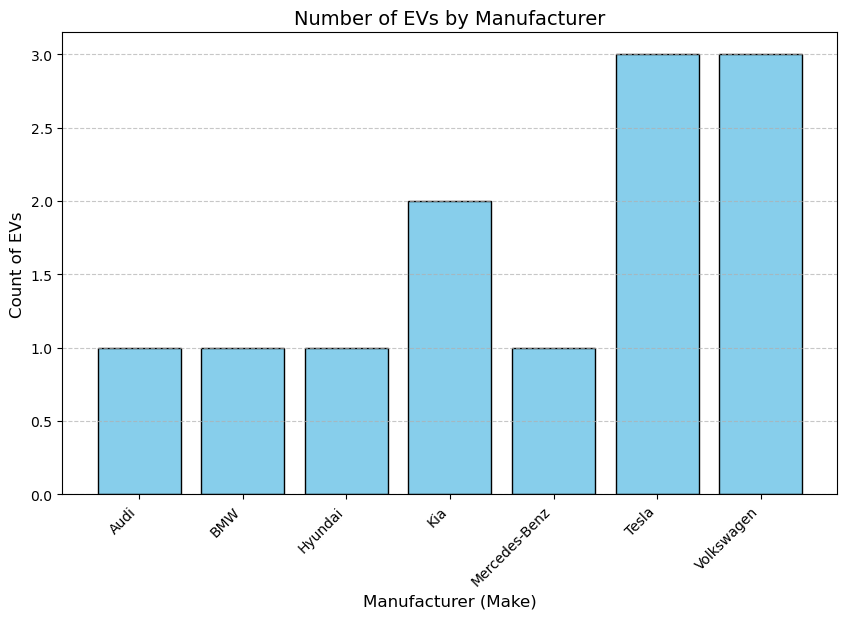

In [20]:
# Bar plot of EV count per manufacturer
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_make["make"], grouped_by_make["count"], color="skyblue", edgecolor="black")

plt.title("Number of EVs by Manufacturer", fontsize=14)
plt.xlabel("Manufacturer (Make)", fontsize=12)
plt.ylabel("Count of EVs", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### c) Calculate the average battery capacity for each manufacturer.

In [21]:
# Calculate average battery capacity by manufacturer
avg_battery_capacity = df.groupby("make")["battery_kwh"].mean().reset_index()

# Rename column for clarity
avg_battery_capacity.columns = ["make", "avg_battery_kwh"]

print(avg_battery_capacity)



             make  avg_battery_kwh
0            Audi        87.000000
1             BMW        54.800000
2          Citron        50.000000
3              DS        50.000000
4           Honda        35.500000
5         Hyundai        47.166667
6          Jaguar        90.000000
7             Kia        51.600000
8           Mazda        35.500000
9   Mercedes-Benz        85.000000
10           Mini        28.900000
11         Nissan        47.333333
12           Opel        50.000000
13        Peugeot        50.000000
14        Porsche        89.850000
15        Renault        52.000000
16          Skoda        36.800000
17          Smart        17.600000
18          Tesla        86.285714
19     Volkswagen        61.075000


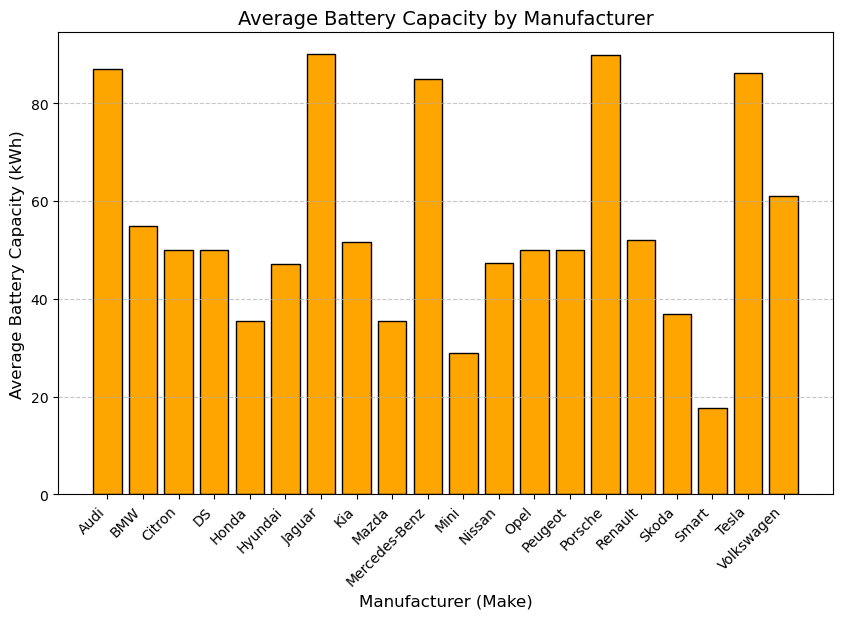

In [22]:
# Plot average battery capacity by manufacturer
plt.figure(figsize=(10, 6))
plt.bar(avg_battery_capacity["make"], avg_battery_capacity["avg_battery_kwh"], 
        color="orange", edgecolor="black")

plt.title("Average Battery Capacity by Manufacturer", fontsize=14)
plt.xlabel("Manufacturer (Make)", fontsize=12)
plt.ylabel("Average Battery Capacity (kWh)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### Task 2: You suspect some EVs have unusually high or low energy consumption. Find the outliers in the mean - Energy consumption [kWh/100 km] column

In [23]:
# Calculate Q1 and Q3
Q1 = df["energy_kwh_per_100km"].quantile(0.25)
Q3 = df["energy_kwh_per_100km"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df["energy_kwh_per_100km"] < lower_bound) | (df["energy_kwh_per_100km"] > upper_bound)]

print("Outliers in energy consumption:")
print(outliers[["car_full_name", "make", "energy_kwh_per_100km"]])
if outliers.empty:
    print("No outliers detected in energy consumption using IQR method.")



Outliers in energy consumption:
Empty DataFrame
Columns: [car_full_name, make, energy_kwh_per_100km]
Index: []
No outliers detected in energy consumption using IQR method.


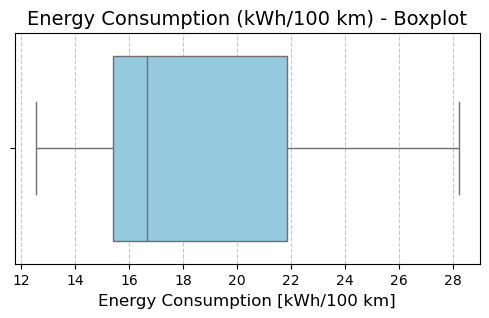

In [24]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["energy_kwh_per_100km"], color="skyblue")

plt.title("Energy Consumption (kWh/100 km) - Boxplot", fontsize=14)
plt.xlabel("Energy Consumption [kWh/100 km]", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


### Show the all columns

In [25]:
df.columns

Index(['car_full_name', 'make', 'model', 'price_pln', 'engine_power_km',
       'max_torque_nm', 'brake_type', 'drive_type', 'battery_kwh', 'range_km',
       'wheelbase_cm', 'length_cm', 'width_cm', 'height_cm', 'empty_weight_kg',
       'gross_weight_kg', 'max_load_kg', 'seats', 'doors', 'tire_in',
       'max_speed_kph', 'boot_l', 'accel_0_100_s', 'dc_power_kw',
       'energy_kwh_per_100km'],
      dtype='object')

### Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.
#### a) Create a suitable plot to visualize.

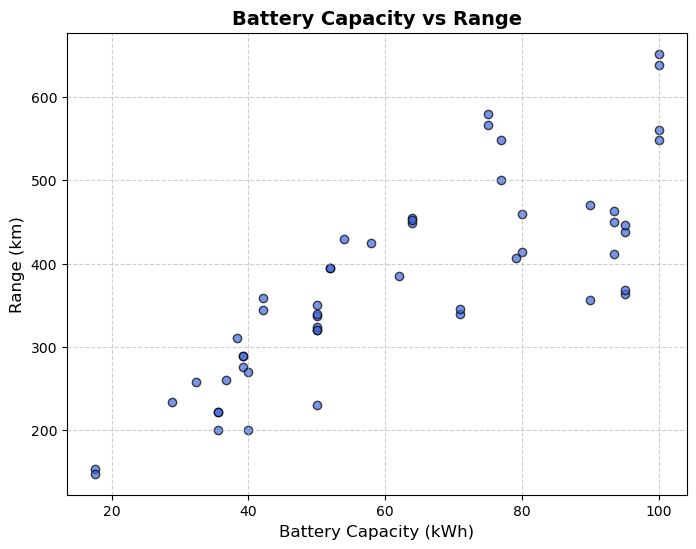

In [26]:
# Scatter plot for Battery Capacity vs Range
plt.figure(figsize=(8, 6))
plt.scatter(df["battery_kwh"], df["range_km"], 
            color="royalblue", alpha=0.7, edgecolor="black")

# Titles and labels
plt.title("Battery Capacity vs Range", fontsize=14, fontweight="bold")
plt.xlabel("Battery Capacity (kWh)", fontsize=12)
plt.ylabel("Range (km)", fontsize=12)

# Grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


### b) Highlight any insights.

### Task 4: Build an EV recommendation class. The class should allow users to input their budget, desired range, and battery capacity. The class should then return the top three EVsmatching their criteria

In [27]:
class EVRecommender:
    def __init__(self, df):
        self.df = df

    def recommend(self):
        # Show min–max values from dataset
        print(f"\nPrice range in dataset: {self.df['price_pln'].min()} - {self.df['price_pln'].max()} PLN")
        print(f"Range (km) in dataset: {self.df['range_km'].min()} - {self.df['range_km'].max()} km")
        print(f"Battery capacity in dataset: {self.df['battery_kwh'].min()} - {self.df['battery_kwh'].max()} kWh\n")

        # Get user inputs
        budget = float(input("Enter your budget (PLN): "))
        min_range = float(input("Enter minimum desired range (km): "))
        min_battery = float(input("Enter minimum battery capacity (kWh): "))

        # Filter dataset based on criteria
        filtered = self.df[
            (self.df["price_pln"] <= budget) &
            (self.df["range_km"] >= min_range) &
            (self.df["battery_kwh"] >= min_battery)
        ]

        # Sort by range (highest first) and price (lowest first)
        filtered = filtered.sort_values(by=["range_km", "price_pln"], ascending=[False, True])

        # Show results
        if filtered.empty:
            print("\nNo matching EVs found for your criteria.")
        else:
            print("\nTop 3 matching EVs:")
            print(filtered[["car_full_name", "make", "price_pln", "range_km", "battery_kwh"]].head(3))


# Example usage:
#recommender = EVRecommender(df)
# recommender.recommend()


### Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi.

In [28]:
from scipy.stats import ttest_ind
import pandas as pd

# Load dataset
df = pd.read_csv("my_file.csv")

# Filter data for Tesla and Audi
tesla_power = df[df["make"] == "Tesla"]["engine_power_km"]
audi_power = df[df["make"] == "Audi"]["engine_power_km"]

# Perform Welch's t-test (does not assume equal variance)
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 5))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\n Conclusion: There IS a statistically significant difference in average engine power between Tesla and Audi.")
else:
    print("\n Conclusion: There is NO statistically significant difference in average engine power between Tesla and Audi.")


T-statistic: 1.794
P-value: 0.10684

 Conclusion: There is NO statistically significant difference in average engine power between Tesla and Audi.


### What insights can you draw from the test results?
### Recommendations and Conclusion: Provide actionable insights based on your analysis.

In [30]:
df.to_csv("Final.csv", index= False)